In [1]:
from functions import *
import matplotlib.pyplot as plt

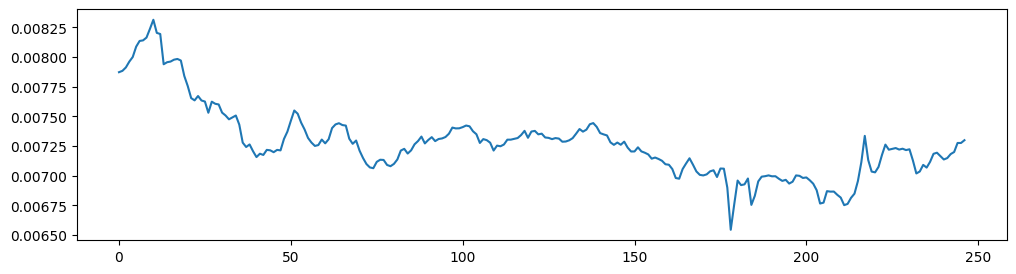

ADF-тест:
ADF статистика: -3.088362393405622
p-value: 0.02742649693523922
Критические значения:
	1%: -3.4578942529658563
	5%: -2.8736593200231484
	10%: -2.573228767361111

KPSS-тест:
KPSS статистика: 1.3732674901618205
p-value: 0.01
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [2]:
rates = rates_request()
plt.figure(figsize=(12, 3))
plt.plot(rates)
plt.show()

ADF_test(rates)
KPSS_test(rates)

Количество выбросов: 21


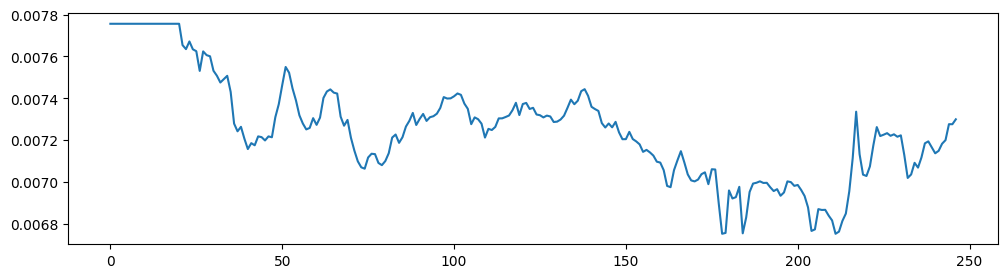

In [3]:
cleaned_rates = IQR_method(rates)
plt.figure(figsize=(12, 3))
plt.plot(cleaned_rates)
plt.show()

Статистика Бокса-Пирса: 231.156727054663


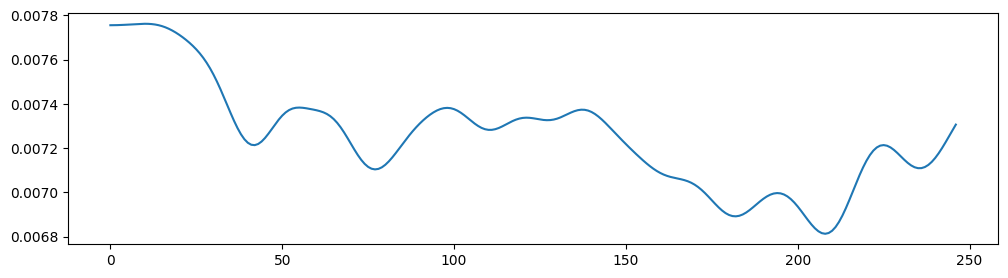

Статистика Бокса-Пирса: 241.3544201710153


In [4]:
Box_Pierce_test(cleaned_rates)
filtered_rates = Butterworth_filter(cleaned_rates)
plt.figure(figsize=(12, 3))
plt.plot(filtered_rates)
plt.show()
Box_Pierce_test(filtered_rates)

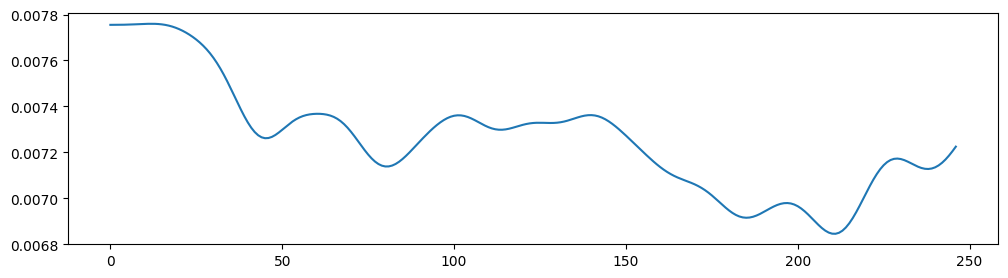

In [5]:
smoothed_rates = EMA(filtered_rates, 0.2)
plt.figure(figsize=(12, 3))
plt.plot(smoothed_rates)
plt.show()

In [6]:
ADF_test(smoothed_rates)
KPSS_test(smoothed_rates)

ADF-тест:
ADF статистика: -2.323898564482469
p-value: 0.16437600663946006
Критические значения:
	1%: -3.459105583381277
	5%: -2.8741898504150574
	10%: -2.5735117958412097

KPSS-тест:
KPSS статистика: 1.6219584882764166
p-value: 0.01
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [7]:
FosterStewart(smoothed_rates)

Количество увеличений: 109
Количество уменьшений: 137
Статистика Z: -3.079589415448419
p-value: 0.0020728613808085328
Ряд имеет значимый тренд.
